# Black-Scholes Model for Vanilla Options

The **Black-Scholes model** is a fundamental pricing framework for European-style options.It provides a **closed-form solution** for option prices under the assumption of:
1. **Log-normal price distribution** for the underlying asset.
2. **No arbitrage** in the market.
3. **Constant risk-free rates and volatility**.

For FX options, the Black-Scholes model is adjusted to account for:
- **Foreign and domestic risk-free rates** (since FX options involve two currencies).
- **Continuous dividend yield interpretation** for foreign currency returns.


## **Mathematical Formulation**
The **Black-Scholes formula** for a European call and put option on FX is given by:

### **Call Option Price**
$C = e^{-r_f T} S_0 N(d_1) - e^{-r_d T} K N(d_2)$

### **Put Option Price**
$
P = e^{-r_d T} K N(-d_2) - e^{-r_f T} S_0 N(-d_1)
$

The **terms $d_1$ and $d_2$** are given by:

- $d_1 = \frac{\ln \left( \frac{S_0}{K} \right) + \left( r_d - r_f + \frac{1}{2} \sigma^2 \right) T}{\sigma \sqrt{T}}$

- $d_2 = d_1 - \sigma \sqrt{T}$

These terms determine the probability that the option will **expire in-the-money (ITM)**.


### **Greeks: Sensitivities of the Option Price**
In risk management, it is crucial to compute **option sensitivities**, also known as **Greeks**.  

#### **Delta ($\Delta$) : Sensitivity to Underlying Price**
Delta measures how much the **option price changes per unit change in the spot price**.

For a **call option**:
- $\Delta_{\text{call}} = e^{-r_f T} N(d_1)$

For a **put option**:
- $\Delta_{\text{put}} = e^{-r_f T} (N(d_1) - 1)$

Delta values help traders hedge their positions in the market to offset price differences.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys
sys.path.append("..") 
from src.black_scholes import BlackScholes

In [22]:
# Define parameters
spot_prices = [0.80, 1.00, 1.05, 1.10, 1.15, 1.20, 1.30, 1.50, 1.75, 2.00]  # Discrete spot prices
strike_price = 1.10  # Fixed strike price
time_to_maturity = 2  # 2 years until expiration
volatility = 0.2  # 20% annualized implied volatility
domestic_rate = 0.05  # USD risk-free rate (5%)
foreign_rate = 0.04  # EUR risk-free rate (4%)

# Store results
results = []

# Compute BS prices for each spot price
for S in spot_prices:
    bs_model = BlackScholes(S, strike_price, time_to_maturity, volatility, domestic_rate, foreign_rate)
    call_price = bs_model.calculate_vanilla_price("call")
    put_price = bs_model.calculate_vanilla_price("put")
    results.append({"Spot Price": S, "Strike Price": strike_price , "Call Price": call_price, "Put Price": put_price})

# Convert results to DataFrame
df_results = pd.DataFrame(results)
df_results



,Spot Price,Strike Price,Call Price,Put Price
0,0.80,1.1,0.018051,0.274879
1,1.00,1.1,0.075548,0.147753
2,1.05,1.1,0.097929,0.123978
3,1.10,1.1,0.123401,0.103295
4,1.15,1.1,0.151763,0.085500
5,1.20,1.1,0.182766,0.070348
6,1.30,1.1,0.251601,0.046871
7,1.50,1.1,0.409135,0.019782
8,1.75,1.1,0.626450,0.006318
9,2.00,1.1,0.852855,0.001943


## Interpretation of Black-Scholes FX Option Prices

The table above shows the **Black-Scholes computed prices** for **FX call and put options** at different **spot prices**, while keeping other parameters constant.

### **Key Observations**

#### **1. Call Prices Increase as Spot Price Increases**
- A **call option gives the right to buy** the underlying asset (EUR/USD).
- As the **spot price (EUR/USD rate) increases**, the **call option price also increases**.
- This is expected because a higher spot price means a higher probability that the call will expire **in-the-money (ITM)**.

#### **2️. Put Prices Decrease as Spot Price Increases**
- A **put option gives the right to sell** the underlying asset.
- As the **spot price increases**, the put option becomes **less valuable**.
- This is because there is a **lower probability of the put being in-the-money** at expiration.

#### **3️. Call & Put Prices Converge Near the Strike Price**
- At **spot price = 1.10 (equal to strike price)**:
  - Call Price ≈ **0.1234**
  - Put Price ≈ **0.1039**
- This happens because **ATM options have the highest time value**, but the expected payoff is uncertain.

#### **4️. Out-of-the-Money (OTM) Options Are Cheap**
- When **spot price = 0.80**, the **call price is very low (≈ 0.0181)**.
  - The call is deep **OTM**, so it has little intrinsic value.
- When **spot price = 2.00**, the **put price is close to zero (≈ 0.0014)**.
  - The put is deep **OTM**, so it is unlikely to be exercised.

#### **5️. The Difference Between Call & Put Prices Reflects Interest Rates**
- FX options are affected by both **domestic & foreign interest rates**.
- Since **USD interest rate (5%) > EUR interest rate (4%)**, the **call price is slightly higher than the put price** at ATM.
- This is due to the **cost of carry effect** in FX options pricing.


In [30]:
# Define FX market parameters
spot_price = 1.30  # EUR/USD FX rate
time_to_maturity = 2  # 3 months to expiration
volatility = 0.07  # 7% annualized implied volatility
domestic_rate = 0.05  # USD risk-free rate 
foreign_rate = 0.04  # EUR risk-free rate

# Generate a range of strike prices
strike_prices = [0.80, 1.00, 1.05, 1.10, 1.15, 1.20, 1.30, 1.50, 1.75, 2.00]

# Store results
call_prices = []
put_prices = []

for K in strike_prices:
    bs_model = BlackScholes(spot_price, K, time_to_maturity, volatility, domestic_rate, foreign_rate)
    call_prices.append(bs_model.calculate_vanilla_price("call"))
    put_prices.append(bs_model.calculate_vanilla_price("put"))

# Create a DataFrame for visualization
results = pd.DataFrame({
    "Spot Price": spot_price,
    "Strike Price": strike_prices,
    "Call Price": call_prices,
    "Put Price": put_prices
})


results


,Spot Price,Strike Price,Call Price,Put Price
0,1.3,0.80,4.761813e-01,2.770193e-09
1,1.3,1.00,2.952796e-01,6.571885e-05
2,1.3,1.05,2.502963e-01,3.243798e-04
3,1.3,1.10,2.059578e-01,1.227742e-03
4,1.3,1.15,1.631928e-01,3.704625e-03
5,1.3,1.20,1.234658e-01,9.219449e-03
6,1.3,1.30,5.974006e-02,3.597746e-02
7,1.3,1.50,6.472947e-03,1.636778e-01
8,1.3,1.75,1.035214e-04,3.835178e-01
9,1.3,2.00,5.311677e-07,6.096241e-01


The table presents **FX option prices computed using the Black-Scholes model**  for different **spot prices S**, while keeping the **strike price fixed at K=1.30**.

### **Key Observations**
#### **1️. Call Prices Decrease as Spot Price Decreases**
- A **call option gives the right to buy the FX pair** at a fixed strike price (1.30).
- As the **spot price decreases**, the call option becomes **less valuable**.
- This is because the probability of the call option **expiring in-the-money (ITM)** is lower.

#### **2️. Put Prices Increase as Spot Price Decreases**
- A **put option gives the right to sell the FX pair** at a fixed strike price (1.30).
- As the **spot price decreases**, the put option **becomes more valuable**.
- This is because the probability of the put option **expiring in-the-money (ITM)** is higher.

#### **3️. ATM Option Prices Are Moderate**
- At **spot price = 1.30 (equal to strike price)**:
  - Call Price ≈ **0.0597**
  - Put Price ≈ **0.0359**
- This is expected because **ATM options have the highest time value**,  
  but their intrinsic value is uncertain at expiry.

#### **4️. Deep OTM Options Are Worth Almost Zero**
- When **spot price = 2.00**, the **call price is almost zero (≈ 5.31 × 10⁻⁷)**.
  - This is because the call is **deep out-of-the-money (OTM)**.
- When **spot price = 0.80**, the **put price is almost zero (≈ 2.77 × 10⁻⁹)**.
  - This is because the put is **deep OTM**, making it unlikely to be exercised.

#### **5️. In-the-Money (ITM) Options Are Expensive**
- When **spot price = 0.80**, the **call price is high (≈ 0.4761)**.
  - This is because the **call is deep in-the-money (ITM)**.
- When **spot price = 2.00**, the **put price is high (≈ 0.6096)**.
  - This is because the **put is deep ITM**.

#### **6️. The Difference Between Call & Put Prices Reflects Interest Rates**
- The **call and put price difference is influenced by the cost-of-carry effect**.
- Since **USD risk-free rate (5%) > EUR risk-free rate (4%)**,  
  the call price is slightly **higher than the put price** at ATM.


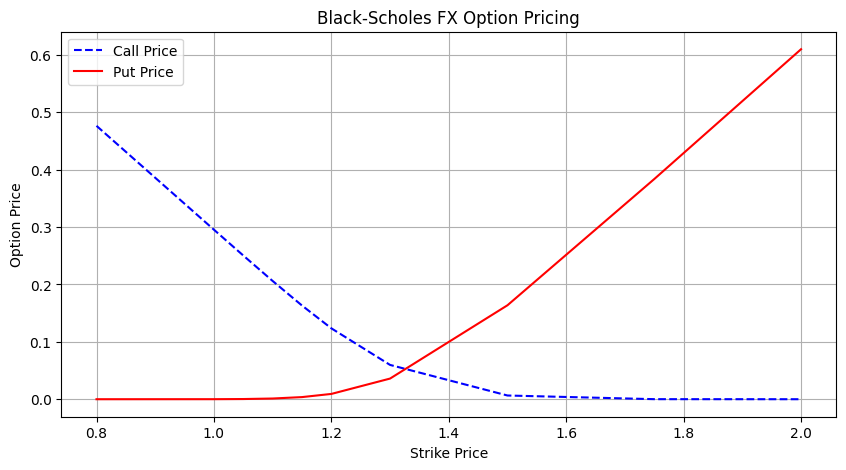

In [33]:
# Plot Call & Put Prices vs. Strike Price
plt.figure(figsize=(10, 5))
plt.plot(strike_prices, call_prices, label="Call Price", linestyle="--", color="blue")
plt.plot(strike_prices, put_prices, label="Put Price", linestyle="-", color="red")

# Labels and title
plt.xlabel("Strike Price")
plt.ylabel("Option Price")
plt.title("Black-Scholes FX Option Pricing")

# Legend and grid
plt.legend()
plt.grid()
plt.show()


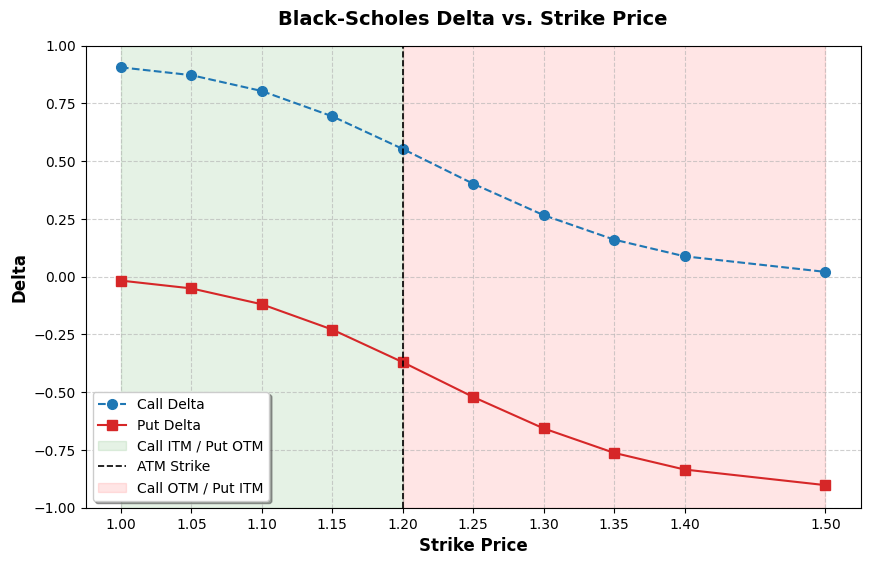

In [ ]:
# Define FX market parameters
spot_price = 1.20  # EUR/USD FX rate
time_to_maturity = 2
volatility = 0.07  # 7% annualized implied volatility
domestic_rate = 0.05  # USD risk-free rate
foreign_rate = 0.04  # EUR risk-free rate 

# Define a range of strike prices
strike_prices = np.array([1.00, 1.05, 1.10, 1.15, 1.20, 1.25, 1.30, 1.35, 1.40, 1.50])

# Store Delta values
call_deltas = []
put_deltas = []

# Compute Delta for each strike price
for K in strike_prices:
    bs_model = BlackScholes(spot_price, K, time_to_maturity, volatility, domestic_rate, foreign_rate)
    call_deltas.append(bs_model.delta("call"))
    put_deltas.append(bs_model.delta("put"))

# Convert to numpy arrays for safety
call_deltas = np.array(call_deltas)
put_deltas = np.array(put_deltas)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(strike_prices, call_deltas, label="Call Delta", linestyle="--", color="#1f77b4", marker="o", markersize=7)
plt.plot(strike_prices, put_deltas, label="Put Delta", linestyle="-", color="#d62728", marker="s", markersize=7)

# Highlight ITM, ATM, OTM regions
plt.axvspan(1.00, spot_price, color="green", alpha=0.1, label="Call ITM / Put OTM")
plt.axvline(spot_price, color="black", linestyle="--", linewidth=1.2, label="ATM Strike")
plt.axvspan(spot_price, 1.50, color="red", alpha=0.1, label="Call OTM / Put ITM")

# Labels and title
plt.xlabel("Strike Price", fontsize=12, fontweight="bold")
plt.ylabel("Delta", fontsize=12, fontweight="bold")
plt.title("Black-Scholes Delta vs. Strike Price", fontsize=14, fontweight="bold", pad=15)
plt.legend(loc="lower left", fontsize=10, frameon=True, shadow=True)

# Grid & formatting
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(strike_prices, fontsize=10)
plt.yticks(np.linspace(-1, 1, 9), fontsize=10)

# Show the plot
plt.show()


## Interpretation of Black-Scholes Delta vs. Strike Price

The graph illustrates how the **Delta** of a **Call and Put option** changes as the **strike price varies**  under the **Black-Scholes model** for FX options.


### **Key Observations**
#### **1️. Call Delta Behavior (Blue Dashed Line)**
- **Deep In-the-Money (ITM) Calls (Strike < Spot)**  
  - When the **strike price is below 1.20**, the **call delta is close to 1**.  
  - This indicates that a **deep ITM call behaves almost like owning the FX spot asset**.  

- **At-the-Money (ATM) Calls (Strike ≈ Spot = 1.20)**  
  - Around **strike = 1.20**, the **call delta is approximately 0.50**.  
  - This reflects the **50% probability that the option will expire ITM or OTM**.

- **Out-of-the-Money (OTM) Calls (Strike > Spot)**  
  - As the **strike price increases beyond 1.30**, the **call delta approaches 0**.  
  - This occurs because deep **OTM calls have a low probability of expiring ITM**.


#### **2️. Put Delta Behavior (Red Solid Line)**
- **Deep In-the-Money (ITM) Puts (Strike > Spot)**  
  - When the **strike price is well above 1.20**, the **put delta is close to -1**.  
  - This means that a **deep ITM put behaves like a short position in the FX spot asset**.

- **At-the-Money (ATM) Puts (Strike ≈ Spot = 1.20)**  
  - Around **strike = 1.20**, the **put delta is approximately -0.50**.  
  - This reflects the **50% chance of expiring ITM or OTM**.

- **Out-of-the-Money (OTM) Puts (Strike < Spot)**  
  - When the **strike price falls below 1.00**, the **put delta approaches 0**.  
  - This occurs because **OTM puts have a low probability of being exercised**.
